# Perceptron wielowarstwowy - prosta sieć neuronowa

### Celem projektu będzie zbudowanie prostej sieci neuronowej za pomocą biblioteki SKLEARN.


<img src="img/nn.png" width="500">

### Jeśli chodzi o dane, posłużę się również wbudowanym zbiorem danych LOAD_DIGITS. Dane te przedstawiają "ręcznie" napisane cyfry od 0 do 9. Jedna obserwacja to jeden obrazek. Jeden obrazek to 8x8 pixeli, czy 64 pixeli posiada jeden obrazek. Mamy zmienne, które reprezentują wartośc nasycenia czerni w poszczeólnym pixelu. Czyli każda zmienna mówi nam w jakim stopniu zaczerniony jest pixel (biały, czarny czy skala szarości)

Zanim jednak przedstawie przykładowe liczby, zaimportuje potrzebne biblioteki no i oczywiście dane.
Dodatkowo podzielę sobie już dane na obserwacje i zmiennie (data, target).

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = load_digits()
X = dataset.data
y= dataset.target

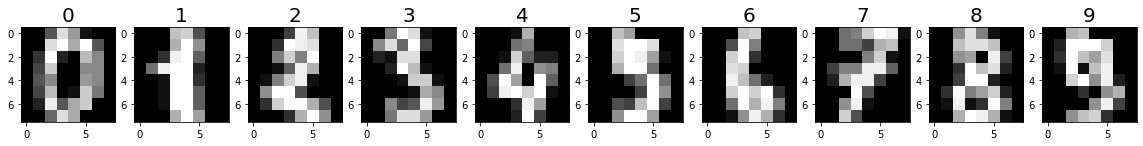

In [3]:
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(dataset.data[0:10], dataset.target[0:10])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize=20)

Sprawdzę ile mamy obserwacji i zmiennych.

In [4]:
print(X.shape)

(1797, 64)


Dodatkowo przed zbudowaniem perceptronu wielowarstwowego, podzielę dane na zbiór treningowy i testowy.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Budowanie sieci neuronowej (perceptron wielowarstwowy)

In [6]:
from sklearn.neural_network import MLPClassifier
#?MLPClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline

Dane zamykają się w przedziale od 0 do 16, gdzie 0 to biały a 16 to czarny to co po środku to skala szarości. Pytanie brzmi czy powinnismy zestandaryzować i zeskalowac dane ? Ogólnie prawie zawsze powinniśmy to robić, żeby dane było w okolicy 0.

Możemy zrobić to np. tak że podzielimy nasze wartości w danej kolumnie przez największą wartość tej kolumny (NIE ZAWSZE, ZALEŻY OD DANYCH) 

Najczęściej robimy tak, że np. przy obrazach gdzie wartości są dodatnie i odpowiadają jakiemuś nasyceniu kolorów, i są to wartości 0+ ,a jeśli wartości są np. ujemne to można podzielić przez maksimum z wartości bezwzględnej i wtedy się przeskaluję do przedziału (-1) - (+1)

Albo za pomocą StandardScalera - ma taką wadę że jeżeli odchylenie standardowe jest bardzo małe to istnieje ryzyko, że po podzieleniu warości będą bardzo duże

Albo za pomocą MaxAbsSclaer - czyli to jest dokładnie dzielenie przez wartość bezwzględną największą w kolumnie (jest to s'kalernowy transformator)

Utworzę teraz dwu warstwową sieć neuronową, gdzie w pierwszej warstwie będą 32 neurony a w drugiej 16. (MLPClassifier((32,16)).
Dodatkowo użyję MaxAbsScaler() w celu zeskalowania danych. Dla tak małych i prostych danych nie powinno to mieć dużego znaczenia, ale warto to zrobić.

Wszystkie powyższe czynności zamknę w pipeline.

In [7]:
model = make_pipeline(MaxAbsScaler(), MLPClassifier((32,16)))

Poniższy błąd mówi o przekroczeniu domyślnej liczby epoko (200) podczas uczenia.
Zmienię ten parametr w kolejnym modelu.

In [8]:
model.fit(X_train, y_train)

D:\Programowanie\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('mlpclassifier', MLPClassifier(hidden_layer_sizes=(32, 16)))])

Sprawdzam skuteczność mojego modelu.

In [9]:
accuracy_score(y_test, model.predict(X_test))

0.9574074074074074

Mój model jest skuteczny w około 95%, całkiem nieźle.
Za każdym uruchomieniem uczenia się, model będzie miał delikatnie inną skuteczność.

### Teraz zbuduję kolejną sieć neuronową z tym, że skupię się na kilku parametrach i hiperparametrach tej sieci.
#### Dodatkowo dodam dwie warstwy ukryte w mojej sieci.

In [9]:
model1 = make_pipeline(MaxAbsScaler(), MLPClassifier((64, 32, 16, 8), 
                                                    activation='tanh',
                                                    solver='sgd',
                                                    batch_size=10,
                                                    max_iter=500,
                                                    shuffle=True))

#### Opis wybranych przeze mnie parametrów i hipermarametrów :
##### Hiperparametry:
* hidden_layer_size - wielkości warst ukrytych, w naszym przypadku (64, 32, 16, 8)
* activation - funcja aktywacji (jedna wspólna dla wszystkich neuronów), do wyboru mamy:
##### identity - neuron zwraca sumę bezpośrednio 
##### logistic - to samo co sigmoid zwraca wartości z przedziało 0-1, 
##### tanh - tangens hiperboliczny bardzo podobny do funkcji sigmoid z tym że jest rozciągnięty z przedziału 0-1 do (-1) - (1)
##### relu - relu ta funkcjia nie jest ogrniaczona 

(Używa się akurat tych funkcji, ponieważ DZIAŁAJĄ :) i łatwo liczy się dla nich pochodne.)

##### Parametry/argumenty:
* solver - algortym uczenia 
##### lbfgs - klasyczny algortym, rzadko używany
##### sgd - liczymy na próbkach, aktualizujemy metodą spadku gradientu
##### adam -  podobny do  SGD, tylko wzór w metodzie spadku gradientu jest trochę zmodyfikowany (zmodyfikowane SGD)


* batch_size - wielkość porcji pojedyńczej obserwacji tzw. BACZ, ma większe znaczenie przy większej ilości danych
* max_iter - liczba epok przez którą, chcemy uczyć sieć (mogą uczyć się kilka epok, a czasami kilkaset, średnio kilkadziesiąt)
* shuffle - przemieszać obserwacje przed uczeniem czy nie. Ogólnie dane powinny być przemieszane, ponieważ kolejność obserwacji może wpłynać na proces uczenia (parametr domyslnie ustawiony jest na TRUE)


##### Jest oczywiście o wiele więcej argumentów dla perceptronu wielowarstwowego, ale mają znaczenie przy większej ilości danych.

In [14]:
model1.fit(X_train, y_train)

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', batch_size=10,
                               hidden_layer_sizes=(64, 32, 16, 8), max_iter=500,
                               solver='sgd'))])

Skuteczność modelu troche się poprawiła, jednak przy kolejnym uruchomieniu wynik ten ulegnie zmianie.

In [15]:
accuracy_score(y_test, model1.predict(X_test))

0.9629629629629629

#####  Sprawdzę jeszcze jak zachowują się moje modele (model, model1) z różnymi ilościami neuronów przy jednej warstwie ukrytej.

### model

In [17]:
for hlz in [1, 5, 10 , 15, 20, 25, 50, 100, 200, 500, 1000, 10000]:
    model = make_pipeline(MaxAbsScaler(), MLPClassifier((hlz), max_iter=100000)) #zmieniłem ilość epok, aby uniknać błędów
    model.fit(X_train, y_train)
    print(hlz,': ',accuracy_score(y_test, model.predict(X_test)))

1 :  0.37592592592592594
5 :  0.9092592592592592
10 :  0.9648148148148148
15 :  0.9703703703703703
20 :  0.9629629629629629
25 :  0.9703703703703703
50 :  0.9722222222222222
100 :  0.9740740740740741
200 :  0.9796296296296296
500 :  0.975925925925926
1000 :  0.9777777777777777
10000 :  0.975925925925926


Widzimy, że za każdym razem gdy uczymy sieć, wynik jest trochę inny ALE podobny. Nauczona sieć nie powinna dawać skranie różnych wyników ponieważ będzie mówiło to o tym że, sieć jest niestabilna i powinniśmy popracować nad stabilnością sieci.

### model1

In [10]:
for hlz in [1, 5, 10 , 15, 20, 25, 50, 100, 200, 500, 1000, 10000]:
    model1 = make_pipeline(MaxAbsScaler(), MLPClassifier((hlz), 
                                                    activation='tanh',
                                                    solver='sgd',
                                                    batch_size='auto',
                                                    max_iter=100000,
                                                    shuffle=True))
    model1.fit(X_train, y_train)
    print(hlz,': ',accuracy_score(y_test, model1.predict(X_test)))

1 :  0.24814814814814815
5 :  0.9148148148148149
10 :  0.9388888888888889
15 :  0.9537037037037037
20 :  0.9537037037037037
25 :  0.9481481481481482
50 :  0.9462962962962963
100 :  0.9425925925925925
200 :  0.95
500 :  0.9518518518518518
1000 :  0.9518518518518518
10000 :  0.9481481481481482


Porównując dwa powyższe modele można zauważyć, że 'model' jest lepszy od 'model1'. 
Pierwszy model zdobył skuteczność na poziomie 97% przy 15 neuronach. Przy wyższych ilościach neuronów ta skuteczność jest minimalnie lepsza, ale muszę wybrać pomiędzy skutecznością, a szybkością uczenia się.

Drugi model zdobył 'jedynie' 95% skuteczności, dodatkowo duża liczba neuronów powoduje prawdopodobnie przeuczenie się modelu.

Wniosek jest prosty - POTĘGA TKWI W PROSTOCIE :)